# Maskinlæring II: Nevrale nettverk og kunstig intelligens
Kunstige nevrale nettverk har likhetstrekk med hvordan hjernen fungerer. Vi bygger dem opp ved hjelp av _noder_ og _sammmenkoblinger_ mellom nodene, ikke ulikt nerveceller og koblinger mellom dem. Nodene ...

Først trener vi nettverket. Da finner vi ut av hvor mye de ulike koblingene mellom noder skal være _vekta_ for at forskjellene mellom faktiske verdier og forutsigelser skal være så små som mulig. En vekt bestemmer hvor sterk en kobling mellom noder er. Vi måler forskjell mellom forutsigelser og faktiske verdier slik:

$$loss = \Sigma (y - ŷ)^2$$

## Lineær regresjon

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.losses import MeanSquaredError
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

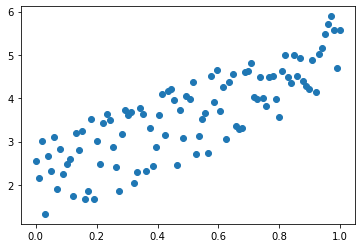

In [88]:
N = 100
x = np.linspace(0,1,N)
y = 3*x + 2 + np.random.uniform(-1,1,N)

plt.scatter(x, y)

Modellen vi kan konstruere fra uttrykket $y = ax + b$ har kun én input-node ($x$) og én output-node ($y$), så det vi må gjøre, er å optimalisere vektingen slik at den nærmer seg _a_, som jo vekter _x_ i funksjonen. Dessuten vil få et et såkalt _bias_-ledd, her representert ved skjæringspunktet _b_ dersom modellen blir trent godt nok.

In [89]:
modell = tf.keras.Sequential()
modell.add(Dense(units=1, activation='linear', input_shape=(1,)))

In [90]:
læringsrate = 0.1  # Hvor fort modellen skal lære
modell.compile(optimizer=Adam(læringsrate), loss = 'mse') # Optimizer = metode for å minimere loss
modell.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Antall parametre er _a_ og _b_ i _y = ax + b_

La oss trene modellen:

In [91]:
modell.fit(x, y, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 19.9186
Epoch 2/500
4/4 [==============================] - 0s 667us/step - loss: 15.3864
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 10.9725
Epoch 4/500
4/4 [==============================] - 0s 666us/step - loss: 7.4139
Epoch 5/500
4/4 [==============================] - 0s 667us/step - loss: 5.2963
Epoch 6/500
4/4 [==============================] - 0s 995us/step - loss: 3.2486
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 1.9574
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 1.0581
Epoch 9/500
4/4 [==============================] - 0s 667us/step - loss: 0.7250
Epoch 10/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5262
Epoch 11/500
4/4 [==============================] - 0s 666us/step - loss: 0.5310
Epoch 12/500
4/4 [==============================] - 0s 667us/step - loss: 0.5364
Epoch 13/500
4/4 [==========================

4/4 [==============================] - 0s 667us/step - loss: 0.3377
Epoch 202/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3441
Epoch 203/500
4/4 [==============================] - 0s 666us/step - loss: 0.3362
Epoch 204/500
4/4 [==============================] - 0s 667us/step - loss: 0.3286
Epoch 205/500
4/4 [==============================] - 0s 667us/step - loss: 0.3363
Epoch 206/500
4/4 [==============================] - 0s 667us/step - loss: 0.3501
Epoch 207/500
4/4 [==============================] - 0s 995us/step - loss: 0.3305
Epoch 208/500
4/4 [==============================] - 0s 667us/step - loss: 0.3595
Epoch 209/500
4/4 [==============================] - 0s 912us/step - loss: 0.3670
Epoch 210/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3488
Epoch 211/500
4/4 [==============================] - 0s 924us/step - loss: 0.3354
Epoch 212/500
4/4 [==============================] - 0s 1000us/step - loss: 0.3502
Epoch 213/500
4/4 [==============

4/4 [==============================] - 0s 667us/step - loss: 0.3312
Epoch 402/500
4/4 [==============================] - 0s 666us/step - loss: 0.3510
Epoch 403/500
4/4 [==============================] - 0s 667us/step - loss: 0.3916
Epoch 404/500
4/4 [==============================] - 0s 667us/step - loss: 0.3519
Epoch 405/500
4/4 [==============================] - 0s 1000us/step - loss: 0.3466
Epoch 406/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3323
Epoch 407/500
4/4 [==============================] - 0s 667us/step - loss: 0.3375
Epoch 408/500
4/4 [==============================] - 0s 667us/step - loss: 0.3260
Epoch 409/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 410/500
4/4 [==============================] - 0s 717us/step - loss: 0.3219
Epoch 411/500
4/4 [==============================] - 0s 667us/step - loss: 0.3336
Epoch 412/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3212
Epoch 413/500
4/4 [================

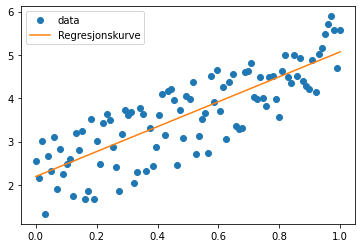

In [92]:
x_fit = np.linspace(0, 1, 100)
y_fit = modell.predict(x_fit)
plt.plot(x, y, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x_fit, y_fit, label = 'Regresjonskurve')
plt.legend()
plt.show()

In [93]:
y1_test = modell.predict([0,])
y2_test = modell.predict([1,])
print(y1_test, y2_test)

[[2.1922004]] [[5.07117]]


## Mer avansert regresjon

In [95]:
x2 = np.linspace(-5, 5, 50)
y2 = x2**4 + x2**3 - 15*x2**2 + np.random.uniform(-1,1,50)

modell2 = tf.keras.Sequential([
    Dense(units = 10, input_shape = (1,), activation = 'sigmoid'),
    Dense(units = 1, activation = 'linear')])

modell2.compile(optimizer=Adam(0.1), loss='mse')
modell2.fit(x2, y2, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 9647.1712
Epoch 2/500
2/2 [==============================] - 0s 999us/step - loss: 7978.7106
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 7920.6356
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 7507.8577
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 8928.0586
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 8945.1504
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 9153.7617
Epoch 8/500
2/2 [==============================] - 0s 1000us/step - loss: 9165.1706
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 7557.5809
Epoch 10/500
2/2 [==============================] - 0s 999us/step - loss: 7661.1515
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 8933.8815
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 6721.0301
Epoch 13/500
2/2 [

2/2 [==============================] - 0s 1ms/step - loss: 3686.9725
Epoch 101/500
2/2 [==============================] - 0s 1000us/step - loss: 4048.7360
Epoch 102/500
2/2 [==============================] - 0s 1ms/step - loss: 3614.6055
Epoch 103/500
2/2 [==============================] - 0s 1ms/step - loss: 3746.2204
Epoch 104/500
2/2 [==============================] - 0s 1ms/step - loss: 3679.2980
Epoch 105/500
2/2 [==============================] - 0s 998us/step - loss: 3357.5959
Epoch 106/500
2/2 [==============================] - 0s 1ms/step - loss: 3595.0094
Epoch 107/500
2/2 [==============================] - 0s 2ms/step - loss: 3218.9601
Epoch 108/500
2/2 [==============================] - 0s 1ms/step - loss: 4270.4574
Epoch 109/500
2/2 [==============================] - 0s 1ms/step - loss: 3354.5789
Epoch 110/500
2/2 [==============================] - 0s 1ms/step - loss: 3545.0312
Epoch 111/500
2/2 [==============================] - 0s 2ms/step - loss: 3247.3210
Epoch 112/500

2/2 [==============================] - 0s 1000us/step - loss: 1588.5876
Epoch 295/500
2/2 [==============================] - 0s 1000us/step - loss: 1777.6324
Epoch 296/500
2/2 [==============================] - 0s 2ms/step - loss: 2036.0262
Epoch 297/500
2/2 [==============================] - 0s 999us/step - loss: 2031.4659
Epoch 298/500
2/2 [==============================] - 0s 1ms/step - loss: 1759.5231
Epoch 299/500
2/2 [==============================] - 0s 1ms/step - loss: 2005.6863
Epoch 300/500
2/2 [==============================] - 0s 256us/step - loss: 1971.1280
Epoch 301/500
2/2 [==============================] - 0s 2ms/step - loss: 1537.0297
Epoch 302/500
2/2 [==============================] - 0s 1ms/step - loss: 1978.3693
Epoch 303/500
2/2 [==============================] - 0s 2ms/step - loss: 1997.8308
Epoch 304/500
2/2 [==============================] - 0s 1ms/step - loss: 1687.2805
Epoch 305/500
2/2 [==============================] - 0s 999us/step - loss: 1989.0505
Epoch 

Epoch 489/500
2/2 [==============================] - 0s 953us/step - loss: 1582.8045
Epoch 490/500
2/2 [==============================] - 0s 1ms/step - loss: 1273.4686
Epoch 491/500
2/2 [==============================] - 0s 1ms/step - loss: 1528.7987
Epoch 492/500
2/2 [==============================] - 0s 997us/step - loss: 1489.7407
Epoch 493/500
2/2 [==============================] - 0s 2ms/step - loss: 1635.0496
Epoch 494/500
2/2 [==============================] - 0s 1ms/step - loss: 1535.9741
Epoch 495/500
2/2 [==============================] - 0s 1ms/step - loss: 1471.6530
Epoch 496/500
2/2 [==============================] - 0s 857us/step - loss: 1215.2944
Epoch 497/500
2/2 [==============================] - 0s 1ms/step - loss: 1413.2102
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 1340.8258
Epoch 499/500
2/2 [==============================] - 0s 944us/step - loss: 1360.0378
Epoch 500/500
2/2 [==============================] - 0s 2ms/step - loss: 1451.9

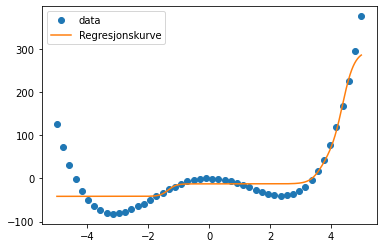

In [96]:
x2_fit = np.linspace(-5, 5, 10000)
y2_fit = modell2.predict(x2_fit)
plt.plot(x2, y2, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x2_fit, y2_fit, label = 'Regresjonskurve')
plt.legend()
plt.show()

In [97]:
modell3 = tf.keras.Sequential([
    Dense(units = 12, input_shape = (1,), activation = 'sigmoid'),
    Dense(units = 8, activation = 'linear'),
    Dense(units = 6, activation = 'linear'),
    Dense(units = 1, activation = 'linear')])

modell3.compile(optimizer=Adam(0.1), loss='mse')
modell3.fit(x2, y2, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 9384.2005
Epoch 2/500
2/2 [==============================] - 0s 1000us/step - loss: 8435.1738
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 7992.6940
Epoch 4/500
2/2 [==============================] - 0s 1000us/step - loss: 7470.3040
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 6624.9678
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 6862.9089
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 6127.8400
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 5926.5771
Epoch 9/500
2/2 [==============================] - 0s 998us/step - loss: 6157.3942
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 5736.3179
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 5064.4155
Epoch 12/500
2/2 [==============================] - 0s 998us/step - loss: 4028.5480
Epoch 13/500

2/2 [==============================] - 0s 1000us/step - loss: 1229.6245
Epoch 101/500
2/2 [==============================] - 0s 2ms/step - loss: 1261.2676
Epoch 102/500
2/2 [==============================] - 0s 998us/step - loss: 1136.3765
Epoch 103/500
2/2 [==============================] - 0s 999us/step - loss: 1042.4987
Epoch 104/500
2/2 [==============================] - 0s 2ms/step - loss: 933.9228
Epoch 105/500
2/2 [==============================] - 0s 2ms/step - loss: 993.9449
Epoch 106/500
2/2 [==============================] - 0s 998us/step - loss: 837.9741
Epoch 107/500
2/2 [==============================] - 0s 999us/step - loss: 872.6969
Epoch 108/500
2/2 [==============================] - 0s 1000us/step - loss: 767.2198
Epoch 109/500
2/2 [==============================] - 0s 1ms/step - loss: 766.7051
Epoch 110/500
2/2 [==============================] - 0s 1ms/step - loss: 680.9204
Epoch 111/500
2/2 [==============================] - 0s 2ms/step - loss: 824.7173
Epoch 112/50

2/2 [==============================] - 0s 1ms/step - loss: 38.2903
Epoch 299/500
2/2 [==============================] - 0s 1ms/step - loss: 31.2443
Epoch 300/500
2/2 [==============================] - 0s 998us/step - loss: 49.8320
Epoch 301/500
2/2 [==============================] - 0s 1ms/step - loss: 49.4957
Epoch 302/500
2/2 [==============================] - 0s 2ms/step - loss: 60.7124
Epoch 303/500
2/2 [==============================] - 0s 1ms/step - loss: 30.0365
Epoch 304/500
2/2 [==============================] - 0s 1000us/step - loss: 41.9080
Epoch 305/500
2/2 [==============================] - 0s 2ms/step - loss: 38.2256
Epoch 306/500
2/2 [==============================] - 0s 1ms/step - loss: 25.1738
Epoch 307/500
2/2 [==============================] - 0s 2ms/step - loss: 37.3334
Epoch 308/500
2/2 [==============================] - 0s 1ms/step - loss: 95.8363
Epoch 309/500
2/2 [==============================] - 0s 998us/step - loss: 46.6545
Epoch 310/500
2/2 [================

2/2 [==============================] - 0s 1ms/step - loss: 73.1492
Epoch 497/500
2/2 [==============================] - 0s 998us/step - loss: 61.7033
Epoch 498/500
2/2 [==============================] - 0s 2ms/step - loss: 69.4786
Epoch 499/500
2/2 [==============================] - 0s 1000us/step - loss: 47.8862
Epoch 500/500
2/2 [==============================] - 0s 2ms/step - loss: 36.2266


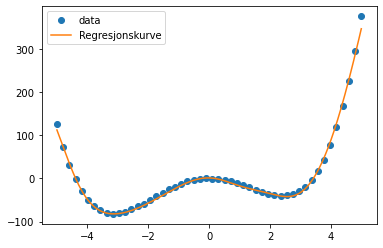

In [98]:
x3_fit = np.linspace(-5, 5, 10000)
y3_fit = modell3.predict(x2_fit)
plt.plot(x2, y2, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x3_fit, y3_fit, label = 'Regresjonskurve')
plt.legend()
plt.show()

## Eksempel

### Lager datasett

In [85]:
train_labels = []
train_samples = []

# 5 % young did not experience side-effects of a drug, 5 % of older did.
for i in range(50):
    random_younger = np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) # side-effects
    
    random_older = np.random.randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0) # not side-effects
    
for i in range(1000):
    random_younger = np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0) # not side-effects
    
    random_older = np.random.randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1) # side-effects

In [86]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) # Normaliserer verdiene mellom 0 og 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # 1D data to 2D

### Bygg modell

In [ ]:
"""
#GPU-akselerasjon
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)
"""
None

In [ ]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Dense = dense/fully connected layer.
# Activation function: Transformation of input to output.
# list of layers. First is a hidden layer. Last layer is output layer. units 16 and 32 is somewhat arbitrary.
# softmax gives probabilities.

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)
#epochs = training iterations. Batch size = training sample size. Verbose: 0, 1 or 2 (level of output)